In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [42]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

x_image = tf.reshape(x, [-1,28,28,1])

W_conv1 = weight_variable([3, 3, 1, 256])
b_conv1 = bias_variable([256])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([3, 3, 256, 256])
b_conv2 = bias_variable([256])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_conv3 = weight_variable([3, 3, 256, 128])
b_conv3 = bias_variable([128])

h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3)

W_fc1 = weight_variable([4 * 4 * 128, 150])
b_fc1 = bias_variable([150])

h_pool3_flat = tf.reshape(h_pool3, [-1, 4*4*128])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)

h_fc1_drop = tf.nn.dropout(h_fc1, 0.3)

W_fc2 = weight_variable([150, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

y_conv_drop = tf.nn.dropout(y_conv, 0.5)

In [43]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [44]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1100):
        batch = mnist.train.next_batch(50)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], 
                                                      y_: batch[1]})
            print("step %d, training accuracy %g"%(i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})

    print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images,
                                                      y_: mnist.test.labels}))

step 0, training accuracy 0.1
step 100, training accuracy 0.5
step 200, training accuracy 0.42
step 300, training accuracy 0.48
step 400, training accuracy 0.7
step 500, training accuracy 0.64
step 600, training accuracy 0.66
step 700, training accuracy 0.7
step 800, training accuracy 0.66
step 900, training accuracy 0.84
step 1000, training accuracy 0.86
test accuracy 0.8098


In [55]:
acc1 = np.load('./accuracies.npy')
acc2 = np.load('./accuracies_layer1.npy')

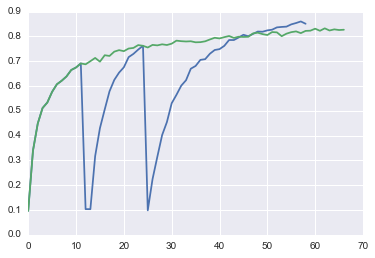

In [56]:
plt.figure()
plt.plot(acc1)
plt.plot(acc2)

In [57]:
len(acc1), len(acc2)

(59, 67)

In [ ]:
acc1 = np.load('./accuracies.npy')
acc2 = np.load('./accuracies_layer2.npy')

array([ 0.10350001,  0.29809999,  0.3908    ,  0.50100005,  0.56050003,
        0.63440001,  0.67749995,  0.70230001,  0.72839999,  0.75279999,
        0.75730002,  0.77490008,  0.78210008,  0.80400002,  0.80179995,
        0.82029992,  0.82530004,  0.82120001,  0.8348999 ,  0.83700001,
        0.84519994,  0.86199999,  0.85360003,  0.86029994,  0.87539995,
        0.87160003,  0.87729996,  0.88270009,  0.8786    ,  0.88550007,
        0.89250004,  0.89390004,  0.89719999,  0.8951    ,  0.90650004,
        0.9016    ,  0.90820009,  0.90129995,  0.91180003,  0.9102    ,
        0.91530001,  0.91280001,  0.91540003,  0.9149    ,  0.91660011,
        0.92230004,  0.91500008,  0.92540008,  0.92210007,  0.92150009,
        0.92400008,  0.92690003,  0.9267    ,  0.92380011,  0.92940009,
        0.93110001], dtype=float32)

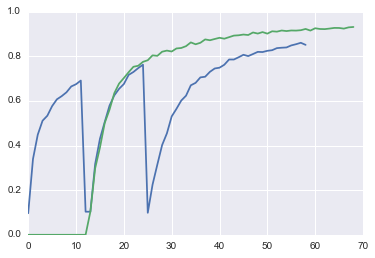

In [67]:
plt.figure()
plt.plot(acc1)
plt.plot([0 for i in range(13)] + list(acc2))

In [59]:
len(acc1), len(acc2)

(59, 56)

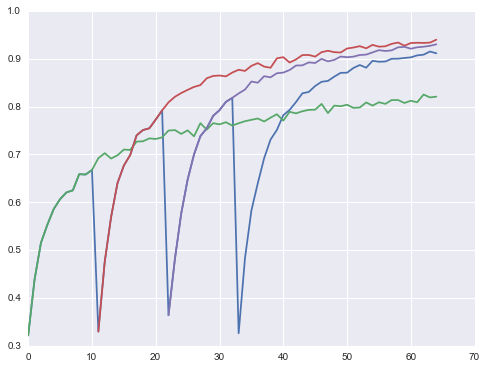

In [99]:
acc = np.load('./accuracies.npy')
acc1 = np.load('./accuracies_layer1.npy')
acc2 = np.load('./accuracies_layer2.npy')
acc3 = np.load('./accuracies_layer3.npy')
#acc4 = np.load('./accuracies_layer4.npy')
plt.figure(figsize=(8,6))
plt.plot(acc)
plt.plot(acc1)
plt.plot([i for i in range(11,65)], list(acc2))
plt.plot([i for i in range(22,65)], list(acc3))

plt.savefig('./comparisons.pdf')
#plt.plot([0 for i in range(12*3 - 3)] + list(acc4))

In [97]:
len([i for i in range(22,66)]), len(acc3)

(44, 43)

In [62]:
[0 for i in range(11)]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]